In [1]:
import os

In [2]:
trackList = [trackFile for trackFile in os.listdir('./tracks/') if trackFile[-4:] == '.npy']
trackList.sort()
[(i, track) for i, track in enumerate(trackList)]

[(0, '2022_july_open.npy')]

### Track

In [3]:
import numpy as np
import optTracker
from importlib import reload

In [4]:
reload(optTracker)

<module 'optTracker' from 'C:\\Users\\jaume\\Notebooks\\DeepRacer\\optTracker.py'>

+++ 2022_july_open.npy:  134 waypoints counterclockwise

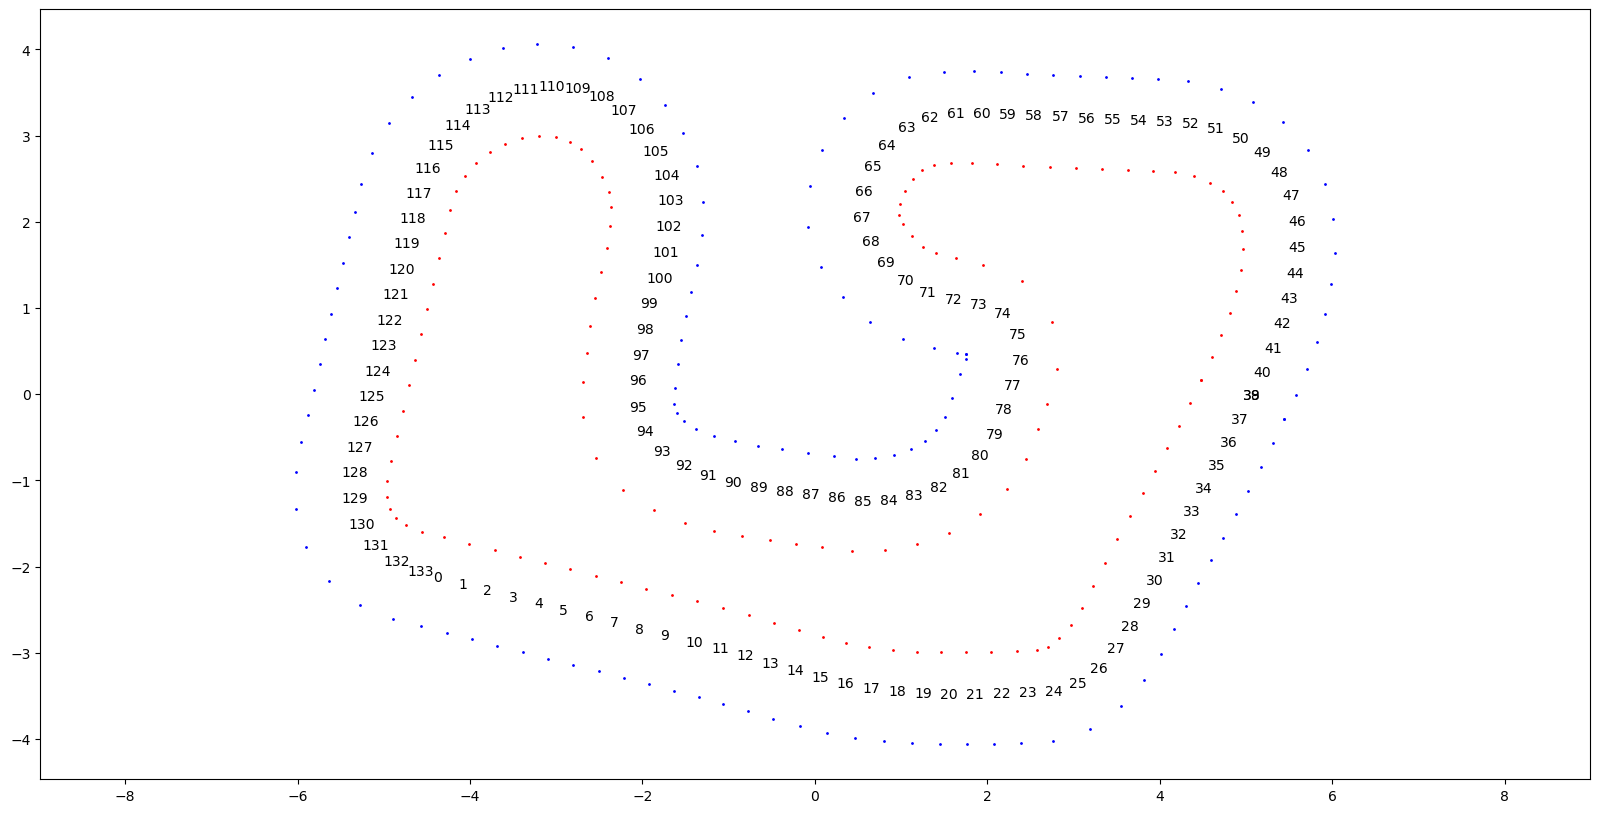

In [5]:
t = optTracker.Track(trackList[0], clockwise = False)
t.plot()
t

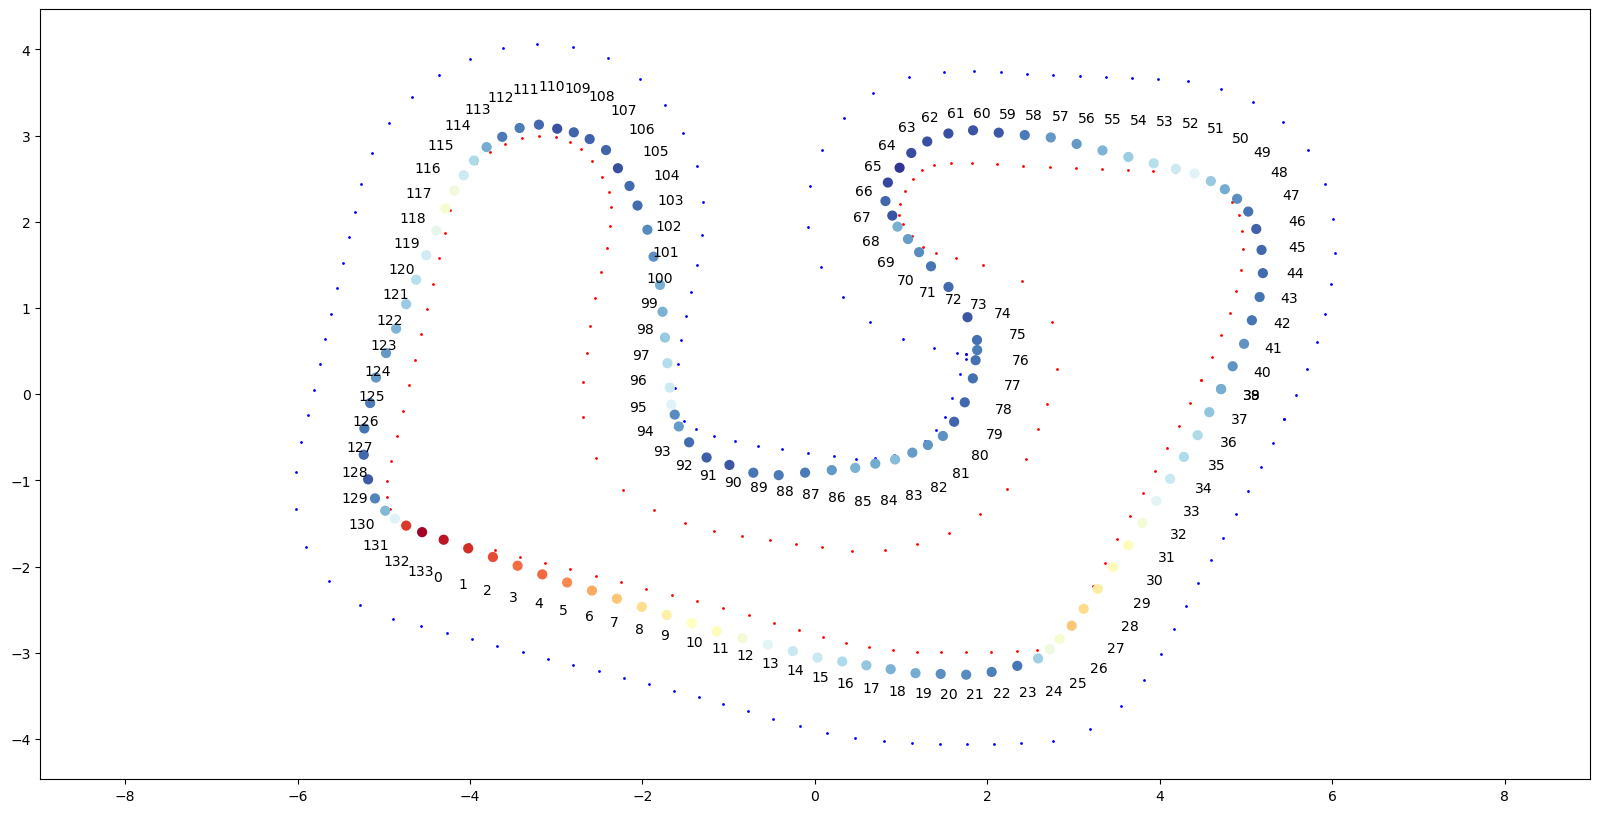

In [6]:
t.optimize(level = 3, margin = 0.005)
t.plot()

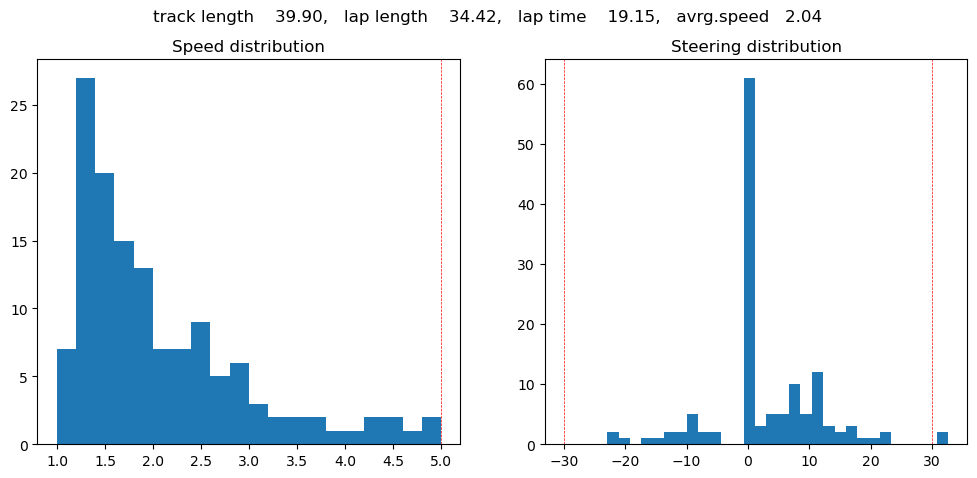

In [7]:
t.summary()

In [8]:
#np.where(np.abs(t.optS()) > 30)

In [9]:
#t.waycone(waypoint = 143, horizon = 40)

### Reward function

In [10]:
t.string()

	X = np.array(array([-4.305 , -4.0203, -3.734 , -3.4477, -3.1613, -2.8732, -2.5849,
       -2.2962, -2.0074, -1.7187, -1.4298, -1.1383, -0.8404, -0.5454,
       -0.2553,  0.0304,  0.3175,  0.5972,  0.8792,  1.167 ,  1.4592,
        1.7546,  2.0503,  2.3473,  2.5889,  2.723 ,  2.8382,  2.9786,
        3.1172,  3.2801,  3.4581,  3.636 ,  3.7984,  3.9598,  4.1202,
        4.2796,  4.4386,  4.5741,  4.7104,  4.7104,  4.8451,  4.9774,
        5.0682,  5.1581,  5.1955,  5.1801,  5.1189,  5.0261,  4.8966,
        4.7543,  4.5924,  4.4036,  4.1861,  3.93  ,  3.6359,  3.3356,
        3.0357,  2.7358,  2.4339,  2.1324,  1.8344,  1.5484,  1.3031,
        1.1181,  0.9824,  0.8464,  0.8185,  0.8979,  0.9583,  1.08  ,
        1.2085,  1.3469,  1.5496,  1.7701,  1.8803,  1.8824,  1.8644,
        1.8322,  1.7381,  1.6154,  1.4846,  1.3105,  1.1307,  0.93  ,
        0.7004,  0.4681,  0.1961, -0.1137, -0.4195, -0.714 , -0.9907,
       -1.2558, -1.4585, -1.5781, -1.6252, -1.6645, -1.6834, -1.7102,
      

In [11]:
import math
import numpy as np

def distance(p, q):
    return np.sqrt((p[0] -q[0])**2 +(p[1] -q[1])**2)

def reward_function(params):

    # optimal track
    
    X = np.array(array([-4.305 , -4.0203, -3.734 , -3.4477, -3.1613, -2.8732, -2.5849,
       -2.2962, -2.0074, -1.7187, -1.4298, -1.1383, -0.8404, -0.5454,
       -0.2553,  0.0304,  0.3175,  0.5972,  0.8792,  1.167 ,  1.4592,
        1.7546,  2.0503,  2.3473,  2.5889,  2.723 ,  2.8382,  2.9786,
        3.1172,  3.2801,  3.4581,  3.636 ,  3.7984,  3.9598,  4.1202,
        4.2796,  4.4386,  4.5741,  4.7104,  4.7104,  4.8451,  4.9774,
        5.0682,  5.1581,  5.1955,  5.1801,  5.1189,  5.0261,  4.8966,
        4.7543,  4.5924,  4.4036,  4.1861,  3.93  ,  3.6359,  3.3356,
        3.0357,  2.7358,  2.4339,  2.1324,  1.8344,  1.5484,  1.3031,
        1.1181,  0.9824,  0.8464,  0.8185,  0.8979,  0.9583,  1.08  ,
        1.2085,  1.3469,  1.5496,  1.7701,  1.8803,  1.8824,  1.8644,
        1.8322,  1.7381,  1.6154,  1.4846,  1.3105,  1.1307,  0.93  ,
        0.7004,  0.4681,  0.1961, -0.1137, -0.4195, -0.714 , -0.9907,
       -1.2558, -1.4585, -1.5781, -1.6252, -1.6645, -1.6834, -1.7102,
       -1.7384, -1.7668, -1.7963, -1.8709, -1.9421, -2.057 , -2.1499,
       -2.2841, -2.4221, -2.6118, -2.7957, -2.9884, -3.2003, -3.4241,
       -3.6255, -3.8071, -3.9525, -4.0719, -4.1799, -4.2832, -4.3898,
       -4.5066, -4.6233, -4.7399, -4.8565, -4.9732, -5.0898, -5.1575,
       -5.2249, -5.2316, -5.1812, -5.1015, -4.983 , -4.8708, -4.74  ,
       -4.5551]))

    Y = np.array(array([-1.6869, -1.787 , -1.8876, -1.9883, -2.089 , -2.183 , -2.277 ,
       -2.3711, -2.4653, -2.5595, -2.6537, -2.7487, -2.8264, -2.9032,
       -2.9788, -3.0532, -3.099 , -3.1435, -3.1885, -3.2343, -3.2433,
       -3.2523, -3.2203, -3.1497, -3.0637, -2.9568, -2.8377, -2.6844,
       -2.4877, -2.2566, -2.0042, -1.7518, -1.4933, -1.2364, -0.981 ,
       -0.7273, -0.4744, -0.2079,  0.0602,  0.0602,  0.325 ,  0.5851,
        0.8579,  1.1278,  1.4046,  1.6738,  1.9169,  2.1187,  2.2668,
        2.3778,  2.4726,  2.5601,  2.6146,  2.6788,  2.7525,  2.8278,
        2.903 ,  2.9782,  3.006 ,  3.0337,  3.0611,  3.0242,  2.9313,
        2.7985,  2.6272,  2.4554,  2.2407,  2.0721,  1.944 ,  1.8   ,
        1.6479,  1.4842,  1.2442,  0.8937,  0.6292,  0.5126,  0.3948,
        0.1844, -0.0936, -0.3189, -0.4836, -0.5886, -0.6771, -0.7562,
       -0.8047, -0.8539, -0.8797, -0.9091, -0.9381, -0.9098, -0.8196,
       -0.7332, -0.557 , -0.3732, -0.236 , -0.1213,  0.0782,  0.3607,
        0.6573,  0.957 ,  1.2678,  1.5957,  1.9082,  2.1889,  2.4157,
        2.6212,  2.8324,  2.9594,  3.0376,  3.0799,  3.1264,  3.0881,
        2.9854,  2.8663,  2.7103,  2.5397,  2.3625,  2.1556,  1.8962,
        1.6122,  1.3285,  1.0448,  0.7612,  0.4775,  0.1937, -0.1018,
       -0.3966, -0.7015, -0.987 , -1.2079, -1.3507, -1.4426, -1.5232,
       -1.5989]))

    H = np.array(array([ -19.3729,  -19.3729,  -19.3729,  -19.3729,  -18.0619,  -18.0619,
        -18.0619,  -18.0619,  -18.0619,  -18.0619,  -18.0619,  -14.6033,
        -14.6033,  -14.6033,  -14.6033,   -9.0521,   -9.0521,   -9.0521,
         -9.0521,   -1.7543,   -1.7543,    6.1889,   13.367 ,   19.5967,
         38.5385,   45.9651,   47.5229,   54.8213,   54.8213,   54.8213,
         54.8213,   57.8579,   57.8579,   57.8579,   57.8579,   57.8579,
         63.0446,   63.0446,   63.0446,   63.0446,   63.0446,   71.5827,
         71.5827,   82.3015,   93.2834,  104.1256,  114.6994,  131.1492,
        142.0448,  149.6495,  155.1592,  165.926 ,  165.926 ,  165.926 ,
        165.926 ,  165.926 ,  165.926 ,  174.7408,  174.7408,  174.7408,
       -172.638 , -159.253 , -144.3387, -128.3722, -128.3722,  -97.4054,
        -64.7651,  -64.7656,  -49.8016,  -49.8016,  -49.8016,  -49.8016,
        -57.8244,  -67.3921,  -88.9734,  -98.6958,  -98.6958, -108.7033,
       -118.5558, -128.4706, -148.9069, -153.7958, -158.4879, -168.0609,
       -168.0609, -174.5794, -174.5794, -174.5794,  174.512 ,  161.9519,
        161.9519,  138.9962,  123.0482,  108.9352,  108.9352,   95.4174,
         95.4174,   95.4174,   95.4174,   95.4174,  102.8313,  102.8313,
        112.2629,  112.2629,  123.1502,  123.1502,  146.2082,  156.9675,
        167.6235,  167.6235, -170.2829, -152.9858, -146.7362, -132.9991,
       -125.0001, -121.3588, -116.5297, -112.3494, -112.3494, -112.3494,
       -112.3494, -112.3494, -112.3494, -112.3494, -102.8918, -102.8918,
        -91.2488,  -79.9987,  -70.1548,  -50.3038,  -39.3481,  -31.5993,
        -22.289 ,  -19.3729]))

    S = np.array(array([ 0.00000e+00,  0.00000e+00,  0.00000e+00,  1.31100e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  3.45860e+00, -0.00000e+00,
        0.00000e+00,  0.00000e+00,  5.55120e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  7.29780e+00, -0.00000e+00,
        7.94330e+00,  7.17800e+00,  6.22980e+00,  1.89417e+01,
        7.42660e+00,  1.55780e+00,  7.29850e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  3.03660e+00,  0.00000e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  5.18660e+00,
        0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        8.53810e+00,  0.00000e+00,  1.07188e+01,  1.09819e+01,
        1.08422e+01,  1.05738e+01,  1.64497e+01,  1.08956e+01,
        7.60470e+00,  5.50970e+00,  1.07668e+01, -0.00000e+00,
       -0.00000e+00,  0.00000e+00,  0.00000e+00, -0.00000e+00,
        8.81480e+00, -0.00000e+00, -0.00000e+00,  1.26213e+01,
        1.33849e+01,  1.49143e+01,  1.59666e+01,  0.00000e+00,
        3.09668e+01,  3.26403e+01, -5.00000e-04,  1.49640e+01,
        0.00000e+00,  0.00000e+00,  0.00000e+00, -8.02280e+00,
       -9.56760e+00, -2.15813e+01, -9.72240e+00,  0.00000e+00,
       -1.00075e+01, -9.85250e+00, -9.91470e+00, -2.04363e+01,
       -4.88890e+00, -4.69210e+00, -9.57300e+00,  0.00000e+00,
       -6.51850e+00,  0.00000e+00,  0.00000e+00, -1.09087e+01,
       -1.25600e+01,  0.00000e+00, -2.29558e+01, -1.59480e+01,
       -1.41130e+01,  0.00000e+00, -1.35178e+01, -0.00000e+00,
        0.00000e+00, -0.00000e+00,  0.00000e+00,  7.41390e+00,
        0.00000e+00,  9.43160e+00,  0.00000e+00,  1.08873e+01,
        0.00000e+00,  2.30580e+01,  1.07593e+01,  1.06560e+01,
        0.00000e+00,  2.20936e+01,  1.72971e+01,  6.24960e+00,
        1.37371e+01,  7.99900e+00,  3.64130e+00,  4.82910e+00,
        4.18030e+00,  0.00000e+00, -0.00000e+00, -0.00000e+00,
        0.00000e+00, -0.00000e+00,  0.00000e+00,  9.45750e+00,
        0.00000e+00,  1.16431e+01,  1.12501e+01,  9.84390e+00,
        1.98510e+01,  1.09557e+01,  7.74880e+00,  9.31040e+00,
        2.91600e+00]))

    V = np.array(array([4.8198, 4.6147, 4.4085, 4.2022, 4.2312, 4.0252, 3.8191, 3.6127,
       3.4062, 3.1999, 2.9934, 3.043 , 2.8338, 2.6266, 2.4228, 2.4261,
       2.2285, 2.036 , 1.8419, 1.8035, 1.6048, 1.5474, 1.4794, 1.4132,
       2.1195, 2.7895, 2.8855, 3.599 , 3.4355, 3.2433, 3.0334, 3.0388,
       2.8313, 2.6251, 2.4201, 2.2165, 2.2218, 2.0186, 1.8142, 1.8142,
       1.6122, 1.6075, 1.412 , 1.3915, 1.3543, 1.3119, 1.281 , 1.3973,
       1.5751, 1.803 , 2.0571, 2.614 , 2.4616, 2.2822, 2.0761, 1.8657,
       1.6555, 1.6396, 1.4336, 1.2278, 1.1973, 1.1671, 1.1584, 1.1439,
       0.9953, 1.1053, 1.3228, 1.1962, 1.8266, 1.6985, 1.5631, 1.4175,
       1.3258, 1.2085, 1.3737, 1.455 , 1.3741, 1.3769, 1.3207, 1.3   ,
       1.5953, 1.6304, 1.6801, 1.9414, 1.782 , 1.8406, 1.6549, 1.4434,
       1.4449, 1.4103, 1.2124, 1.2529, 1.3551, 1.6705, 1.5719, 2.5822,
       2.446 , 2.2531, 2.0506, 1.846 , 1.8339, 1.6054, 1.5574, 1.3512,
       1.334 , 1.1671, 1.2942, 1.2908, 1.3064, 1.1723, 1.3318, 1.4568,
       1.444 , 1.7942, 2.2048, 2.4578, 2.8019, 2.8865, 2.6958, 2.4871,
       2.2786, 2.0702, 1.8617, 1.6532, 1.645 , 1.4391, 1.3905, 1.3115,
       1.2309, 1.5089, 1.9169, 2.5856, 4.544 , 5.    ]))

    # parameters
    
    waypoints = params['waypoints']
    x = params['x']
    y = params['y']
    v = params['speed']
    h = params['heading']
    s = params['steering_angle']
    
    # previous waypoint
    i0 = np.mod(params['closest_waypoints'][0], X.shape[0])
    p0 = waypoints[i0]
    
    # next waypoint
    i1 = np.mod(params['closest_waypoints'][1], X.shape[0])
    p1 = waypoints[i1]

    # distance to closest waypoints
    d0 = distance((x, y), p0)
    d1 = distance((x, y), p1)
    
    # interpolation weights
    w0 = d0 /(d0 +d1)
    w1 = d1 /(d0 +d1)

    # closets waypoint
    i = np.mod(params['closest_waypoints'][0 if d0 <= d1 else 1], X.shape[0])
    
    # penalty for position
    x_optimal = X[i0] *w1 +X[i1] *w0
    y_optimal = Y[i0] *w1 +Y[i1] *w0
    position = min(1, distance((x, y), (x_optimal, y_optimal)) /params['track_width'])
    
    # penalty for heading
    h_optimal = H[i -1] *w1 +H[i] *w0
    heading = ((h_optimal -h)**2 if np.abs(h_optimal -h) < 180 else (360 - (h_optimal -h))**2) /180**2
    
    # penalty for steering
    s_optimal = S[i -1] *w1 + S[i] *w0
    steering = (s_optimal - s)**2 /30**2
    
    # penalty for speed
    v_optimal = V[i -1] *w1 + V[i] *w0                  
    speed = (v_optimal - v)**2 /5**2
    
    # reward function
    W = np.array([0.25, 0.25, 0.25, 0.25])
    R = 1 -(W[0] *position + W[1] *heading + W[2] *steering + W[3] *speed)
    
    return R
